In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime

In [2]:
data=pd.read_csv("godavari_daily.csv")
data1=pd.read_excel("godavari_monthly.xlsx")
y=data['Flood']
data.drop(columns='Flood',axis=1,inplace=True)

In [3]:
set(y)

{0, 1, 2}

In [4]:
d1=pd.DataFrame()
d1["Day"]=data['Date']
d1['Months']=data['Date']
d1['Year']=data['Date']


In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
d1["Year"]=data.Date.dt.year
d1["Months"]=data.Date.dt.month
d1["Day"]=data.Date.dt.day
d1.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [7]:
type(d1['Day'][0])

numpy.int64

In [8]:
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,1449.0,0.0,0.41,NaN
1,1998-01-02,1449.0,0.0,0.41,NaN
2,1998-01-03,2017.0,0.0,0.56,NaN
3,1998-01-04,2017.0,0.0,0.56,NaN
4,1998-01-05,1533.0,0.0,0.43,NaN


In [9]:
data = data.fillna(data.mean())
data.info()
data.drop(columns='Date',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
Date             7670 non-null datetime64[ns]
Discharge        7670 non-null float64
flood runoff     7670 non-null float64
daily runoff     7670 non-null float64
weekly runoff    7670 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 299.7 KB


In [10]:
data.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,1449.0,0.0,0.41,6.747351
1,1449.0,0.0,0.41,6.747351
2,2017.0,0.0,0.56,6.747351
3,2017.0,0.0,0.56,6.747351
4,1533.0,0.0,0.43,6.747351


In [11]:
data=pd.concat([d1,data],axis=1)
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,1449.0,0.0,0.41,6.747351
1,2,1,1998,1449.0,0.0,0.41,6.747351
2,3,1,1998,2017.0,0.0,0.56,6.747351
3,4,1,1998,2017.0,0.0,0.56,6.747351
4,5,1,1998,1533.0,0.0,0.43,6.747351


In [12]:
scl=MinMaxScaler()
data1=scl.fit_transform(data.iloc[:,3:])
data1=scl.fit_transform(data1)

In [13]:
column=['Discharge','flood runoff','daily runoff','weekly runoff']

In [14]:
data1=pd.DataFrame(data1,columns=column)
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.067037,0.0,0.067769,0.182312
1,0.067037,0.0,0.067769,0.182312
2,0.093315,0.0,0.092562,0.182312
3,0.093315,0.0,0.092562,0.182312
4,0.070923,0.0,0.071074,0.182312


In [15]:
x=pd.DataFrame(data=data['Day'])
x['Months']=data['Months']
x['Year']=data['Year']
x.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [16]:
data1=pd.concat([x,data1],axis=1)

In [17]:
data=data1
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,0.067037,0.0,0.067769,0.182312
1,2,1,1998,0.067037,0.0,0.067769,0.182312
2,3,1,1998,0.093315,0.0,0.092562,0.182312
3,4,1,1998,0.093315,0.0,0.092562,0.182312
4,5,1,1998,0.070923,0.0,0.071074,0.182312


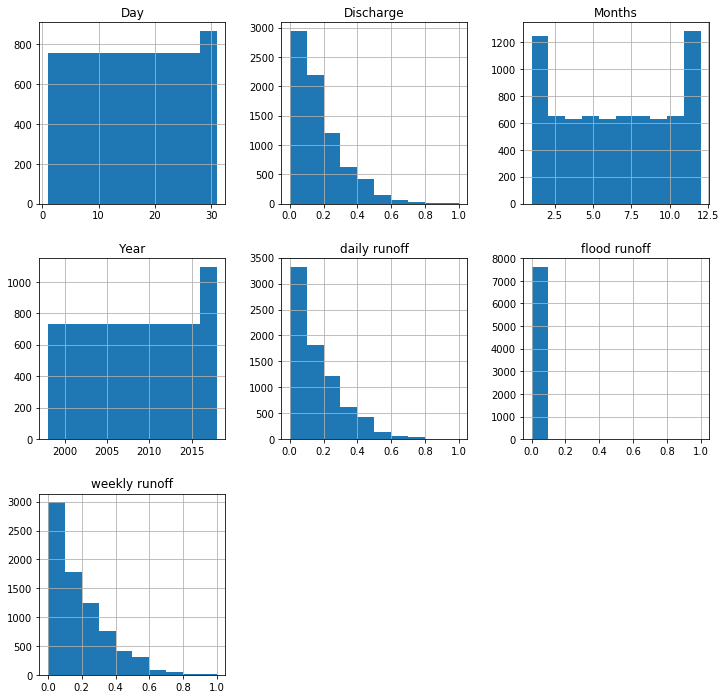

In [18]:
data.hist(figsize=(12,12));

In [19]:
print(data.columns)

Index(['Day', 'Months', 'Year', 'Discharge', 'flood runoff', 'daily runoff',
       'weekly runoff'],
      dtype='object')


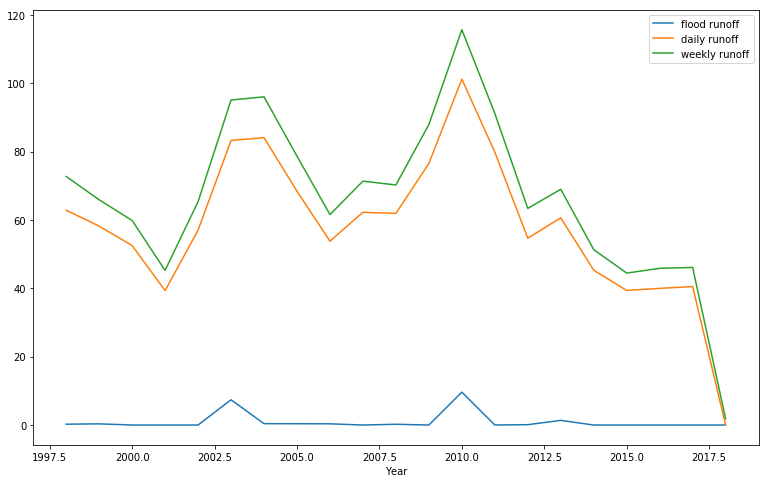

In [20]:
data[['Year', 'flood runoff', 'daily runoff', 'weekly runoff']].groupby("Year").sum().plot(figsize=(13,8));

In [21]:
locate=0;
for i in range(len(data["Day"])):
    if(data["Day"][i]==31 and data["Months"][i]==12 and data["Year"][i]==2012):
        locate=i;
        break;

i=locate+1
print(i)

x_train=data.iloc[0:i,:]
y_train=y.iloc[0:i]
x_test=data.iloc[i:,:]
y_test=y.iloc[i:]


5479


In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5479, 7)
(5479,)
(2191, 7)
(2191,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
reg=LinearRegression()
reg.fit(x_train,y_train)
yp=reg.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))


0.874972259930559
0.6852081430497841


In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

0.015428145254662648


In [28]:
yt=np.array(y_test)
len(set(y_test))

2

In [29]:
Y_pre=pd.DataFrame()
Y_pre["ypre"]=y_pred
Y_pre["ytest"]=yt
#Y_pre

,ypre,ytest
0,0.011863,0
1,0.011863,0
2,0.011863,0
3,0.011863,0
4,0.011863,0
5,0.011863,0
6,0.011863,0
7,0.011863,0
8,0.011863,0
9,0.011863,0


In [ ]:
Y_pre[['ypre','ytest']].groupby("ytest").sum().plot(figsize=(19,8));